<a href="https://colab.research.google.com/github/KishorAlagappan/Customer_Conversion_Prediction/blob/main/Customer_Conversion_Prediction_ML_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## **Customer Conversion Prediction**


***A. Import all the Required libraries***

In [17]:
## Import all the Required libraries 

## Data Analysis libraries
import pandas as pd   ## To handle the dataset
import numpy as np    ## To do Numerical calculation

## Data Visualization libraries
import matplotlib.pyplot as plt    
import seaborn as sns
%matplotlib inline 
sns.set_style('darkgrid')   ## To set the default background color 


## Machine Learning libraries
from imblearn.combine import SMOTEENN   ## To handle Imbalanced datasets
from sklearn.preprocessing import StandardScaler  ## To Standardize the features in the dataset
from sklearn.model_selection import train_test_split  ## To Split the dataset
from sklearn.model_selection import cross_val_score   ## To find Cross validation Score 
from sklearn.neighbors import KNeighborsClassifier  ## To implement k-nearest neighbors algorithm for classification
from sklearn.tree import DecisionTreeClassifier   ## To implement Decision Tree algorithm for classification
from sklearn.ensemble import RandomForestClassifier   ## To implement Random Forest algorithm for classification
from xgboost import XGBClassifier   ## To implement XGBoost algorithm for classification
from sklearn.metrics import roc_auc_score,accuracy_score  ##  Both evaluation metrics used to assess the performance of classification models

## Other libraries
import warnings 
warnings.filterwarnings("ignore")   ## To ignores all warning messages generated by the interpreter

***B. Read the Dataset***

In [18]:
import pandas as pd 

dataset = pd.read_csv('train.csv')  ## Read the CSV file 
dataset.head(10)    ## To display the first 10 rows of dataset

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
5,35,management,married,tertiary,unknown,5,may,139,1,unknown,no
6,28,management,single,tertiary,unknown,5,may,217,1,unknown,no
7,42,entrepreneur,divorced,tertiary,unknown,5,may,380,1,unknown,no
8,58,retired,married,primary,unknown,5,may,50,1,unknown,no
9,43,technician,single,secondary,unknown,5,may,55,1,unknown,no


In [19]:
dataset.info()    ## To display a concise summary of a dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   call_type       45211 non-null  object
 5   day             45211 non-null  int64 
 6   mon             45211 non-null  object
 7   dur             45211 non-null  int64 
 8   num_calls       45211 non-null  int64 
 9   prev_outcome    45211 non-null  object
 10  y               45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


In [20]:
dataset.shape   ## To find the shape of a dataframe (number of rows and columns in the dataset)

(45211, 11)

In [21]:
dataset.isnull().sum()    ## To checks for missing or null values in a dataframe

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [22]:
dataset = dataset.drop_duplicates()   ## To remove the duplicate values  of a dataframe
dataset.shape 

(45205, 11)

In [23]:
dataset.dtypes  ## To find the data types of each column in a dataframe

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

In [24]:
dataset.describe()    ## To get the statistical summary of a dataframe

,age,day,dur,num_calls
count,45205.000000,45205.00000,45205.000000,45205.000000
mean,40.937087,15.80688,258.183055,2.763898
std,10.619130,8.32234,257.538504,3.098189
min,18.000000,1.00000,0.000000,1.000000
25%,33.000000,8.00000,103.000000,1.000000
50%,39.000000,16.00000,180.000000,2.000000
75%,48.000000,21.00000,319.000000,3.000000
max,95.000000,31.00000,4918.000000,63.000000


**Missing Value Analysis**

In [ ]:
dataset['age'].value_counts()

32    2084
31    1996
33    1972
34    1929
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: age, Length: 77, dtype: int64

In [ ]:
dataset['job'].value_counts()

blue-collar      9730
management       9457
technician       7596
admin.           5170
services         4153
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [ ]:
dataset['job'].replace('unknown', 'blue-collar', inplace = True)

In [ ]:
dataset['marital'].value_counts()

married     27210
single      12788
divorced     5207
Name: marital, dtype: int64

In [ ]:
dataset['education_qual'].value_counts()

secondary    23199
tertiary     13299
primary       6850
unknown       1857
Name: education_qual, dtype: int64

In [ ]:
dataset['education_qual'].replace('unknown', 'secondary', inplace = True)

In [ ]:
dataset['call_type'].value_counts()

cellular     29282
unknown      13017
telephone     2906
Name: call_type, dtype: int64

In [ ]:
dataset['day'].value_counts().sort_index()

1      322
2     1292
3     1079
4     1445
5     1910
6     1932
7     1817
8     1840
9     1560
10     524
11    1479
12    1603
13    1585
14    1848
15    1703
16    1415
17    1939
18    2308
19    1756
20    2752
21    2026
22     905
23     939
24     447
25     840
26    1035
27    1121
28    1829
29    1745
30    1566
31     643
Name: day, dtype: int64

In [ ]:
dataset['mon'].value_counts()

may    13765
jul     6894
aug     6245
jun     5339
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: mon, dtype: int64

In [ ]:
dataset['dur'].value_counts().sort_index()

0        3
1        2
2        3
3        4
4       15
        ..
3366     1
3422     1
3785     1
3881     1
4918     1
Name: dur, Length: 1573, dtype: int64

In [ ]:
dataset['num_calls'].value_counts().sort_index()

1     17542
2     12503
3      5521
4      3520
5      1764
6      1291
7       735
8       540
9       327
10      266
11      201
12      155
13      133
14       93
15       84
16       79
17       69
18       51
19       44
20       43
21       35
22       23
23       22
24       20
25       22
26       13
27       10
28       16
29       16
30        8
31       12
32        9
33        6
34        5
35        4
36        4
37        2
38        3
39        1
41        2
43        3
44        1
46        1
50        2
51        1
55        1
58        1
63        1
Name: num_calls, dtype: int64

In [ ]:
dataset['prev_outcome'].value_counts()

unknown    36953
failure     4901
other       1840
success     1511
Name: prev_outcome, dtype: int64

In [ ]:
dataset['y'].value_counts()

no     39916
yes     5289
Name: y, dtype: int64

Outlier Detection

In [ ]:
dataset.describe()

,age,day,dur,num_calls
count,45205.000000,45205.00000,45205.000000,45205.000000
mean,40.937087,15.80688,258.183055,2.763898
std,10.619130,8.32234,257.538504,3.098189
min,18.000000,1.00000,0.000000,1.000000
25%,33.000000,8.00000,103.000000,1.000000
50%,39.000000,16.00000,180.000000,2.000000
75%,48.000000,21.00000,319.000000,3.000000
max,95.000000,31.00000,4918.000000,63.000000


In [ ]:
iqr_age = dataset.age.quantile(0.75) - dataset.age.quantile(0.25)
print('iqr_age :',iqr_age)
lower_limit_age = dataset.age.quantile(0.25) - (1.5 * iqr_age)
print('lower_limit_age',lower_limit_age)
upper_limit_age = dataset.age.quantile(0.75) + (1.5 * iqr_age)
print('upper_limit_age',upper_limit_age)

dataset['age'] = dataset['age'].clip(lower_limit_age, upper_limit_age )

iqr_age : 15.0
lower_limit_age 10.5
upper_limit_age 70.5


In [ ]:
iqr_dur = dataset.dur.quantile(0.75) - dataset.dur.quantile(0.25)
print('iqr_dur:',iqr_age)
lower_limit_dur = dataset.dur.quantile(0.25) - (1.5 * iqr_dur)
print('lower_limit_dur:',lower_limit_dur)
upper_limit_dur = dataset.dur.quantile(0.75) + (1.5 * iqr_dur)
print('upper_limit_dur:',upper_limit_dur)

dataset['dur'] = dataset['dur'].clip(lower_limit_dur,upper_limit_dur)

iqr_dur: 15.0
lower_limit_dur: -221.0
upper_limit_dur: 643.0


In [ ]:
iqr_call = dataset.num_calls.quantile(0.75) - dataset.num_calls.quantile(0.25)
print('iqr_call:',iqr_call)
lower_limit_call = dataset.num_calls.quantile(0.25) - (1.5 * iqr_call)
print('lower_limit_call:',lower_limit_call)
upper_limit_call = dataset.num_calls.quantile(0.75) + (1.5 * iqr_call)
print('upper_limit_call:',upper_limit_call) 
dataset['num_calls'] = dataset['num_calls'].clip(lower_limit_call, upper_limit_call)

iqr_call: 2.0
lower_limit_call: -2.0
upper_limit_call: 6.0


In [ ]:
dataset.describe()

,age,day,dur,num_calls
count,45205.000000,45205.00000,45205.00000,45205.000000
mean,40.869052,15.80688,234.95620,2.392235
std,10.395247,8.32234,176.75476,1.600152
min,18.000000,1.00000,0.00000,1.000000
25%,33.000000,8.00000,103.00000,1.000000
50%,39.000000,16.00000,180.00000,2.000000
75%,48.000000,21.00000,319.00000,3.000000
max,70.500000,31.00000,643.00000,6.000000


**EDA - Exploratory Data Analysis**

Target Variable - ('y')

In [ ]:
dataset['target'] = dataset['y'].map({"yes":1, "no":0})

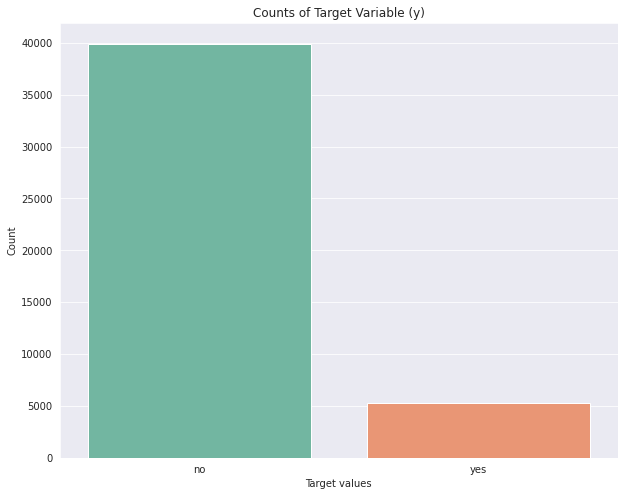

In [ ]:
plt.rcParams['figure.figsize'] = [10,8]
sns.countplot(x='y', data=dataset, palette='Set2')
plt.xlabel('Target values')
plt.ylabel('Count')
plt.title('Counts of Target Variable (y)')

Feature - 01 ('age')

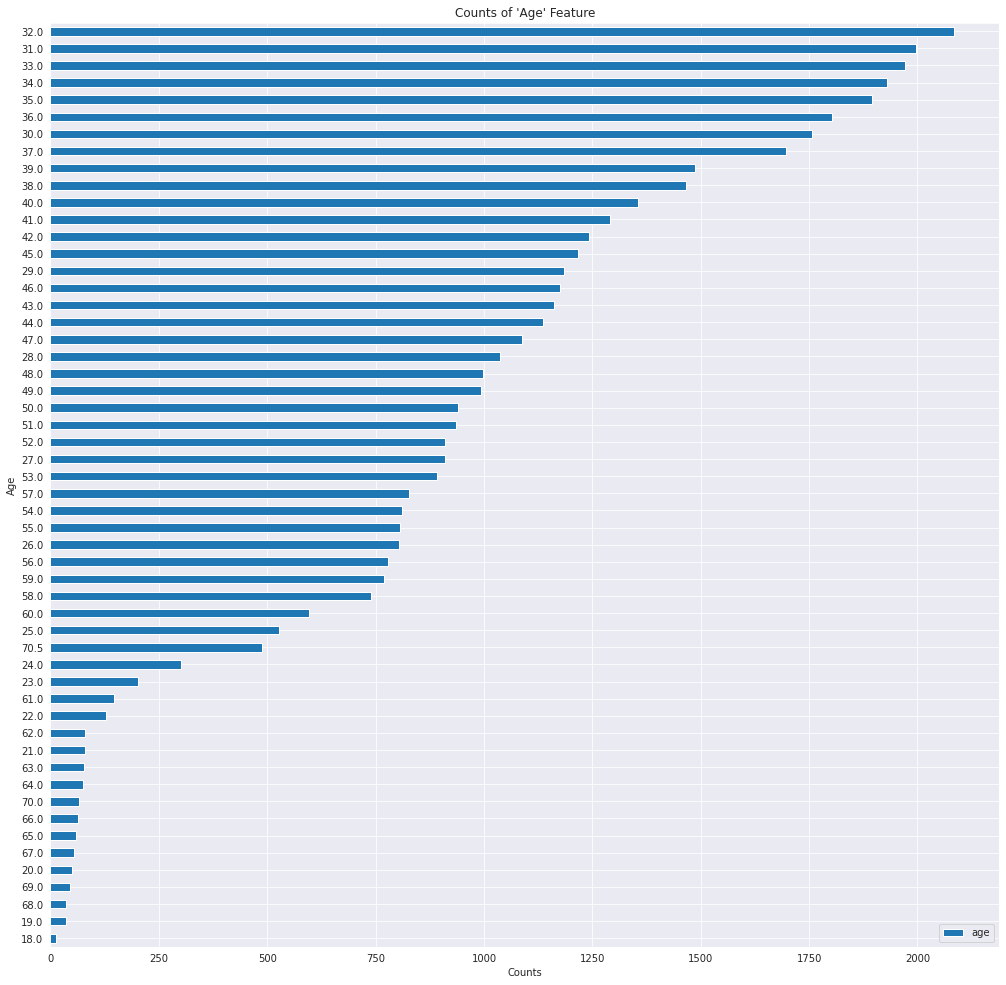

In [ ]:
plt.rcParams['figure.figsize'] = [17,17]
pd.DataFrame(dataset['age'].value_counts().sort_values()).plot(kind='barh')
plt.xlabel('Counts')
plt.ylabel('Age')
plt.title("Counts of 'Age' Feature")

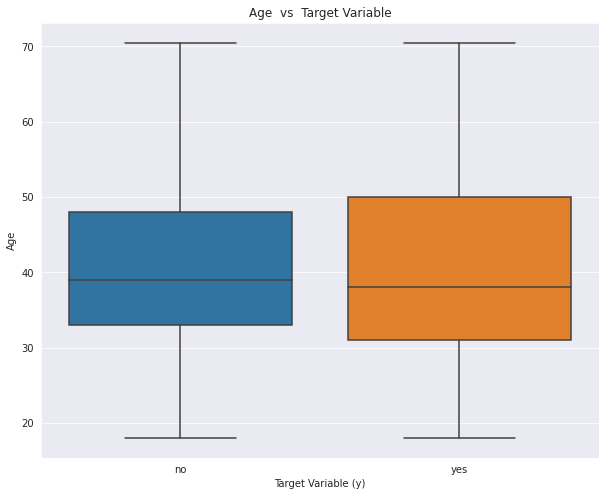

In [ ]:
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data=dataset, x='y', y='age')
plt.xlabel('Target Variable (y)')
plt.ylabel('Age')
plt.title('Age  vs  Target Variable')

Feature - 2  ('job')

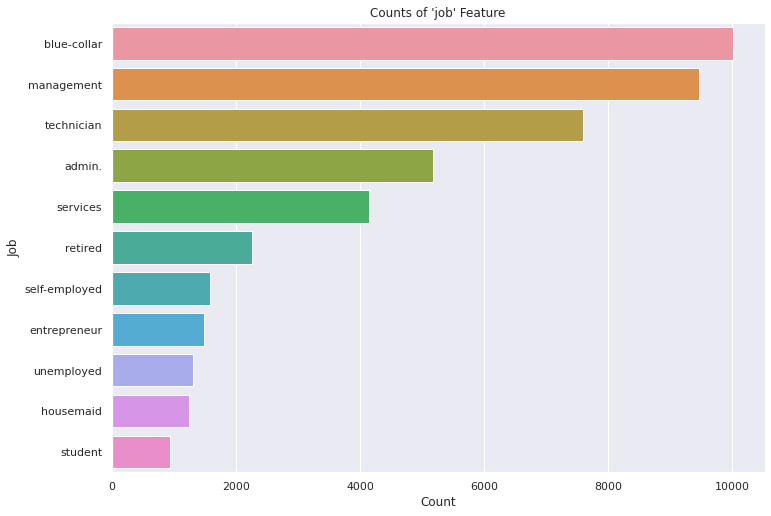

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
v_job = pd.DataFrame(dataset['job'].value_counts()).reset_index()
v_job.rename(columns= {'index':'Job', 'job':'Count'}, inplace= True)
plt.title('Counts of \'job\' Feature')
sns.barplot(x= v_job['Count'], y= v_job['Job'], data= v_job)

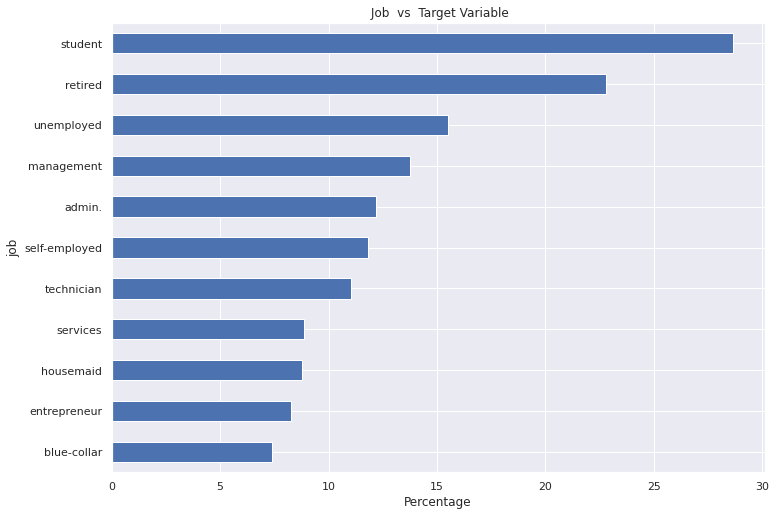

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
(dataset.groupby('job')['target'].mean()*100).sort_values().plot(kind='barh')
plt.xlabel('Percentage')
plt.title(' Job  vs  Target Variable')
plt.show()

In [ ]:
job_per = pd.DataFrame(((dataset.groupby('job')['target'].mean()*100).round(decimals =2)).sort_values(ascending= False)).reset_index()
job_per.rename(columns= {'target':'Percentage'}, inplace= True)
job_per

,job,Percentage
0,student,28.68
1,retired,22.79
2,unemployed,15.50
3,management,13.76
4,admin.,12.21
5,self-employed,11.84
6,technician,11.06
7,services,8.89
8,housemaid,8.79
9,entrepreneur,8.27


Feature - 3 ('marital') 

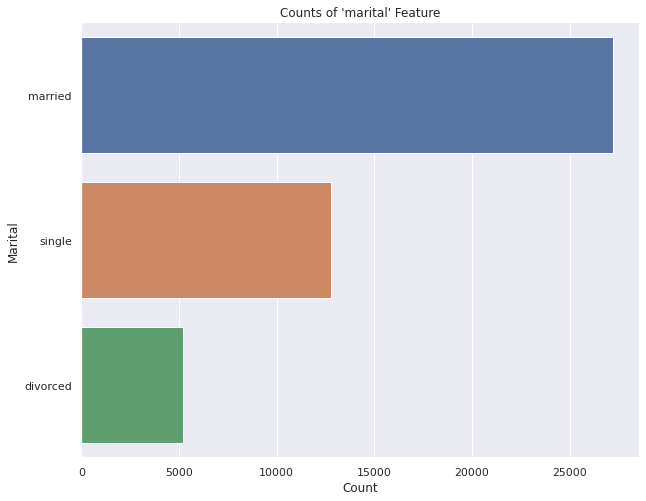

In [ ]:
plt.rcParams['figure.figsize'] = [10,8]
v_mar = pd.DataFrame(dataset['marital'].value_counts()).reset_index()
v_mar.rename(columns={'index':'Marital', 'marital':'Count'}, inplace=True)
sns.barplot(x= v_mar['Count'], y= v_mar['Marital'], data=v_mar)
plt.title('Counts of \'marital\' Feature')
plt.show()

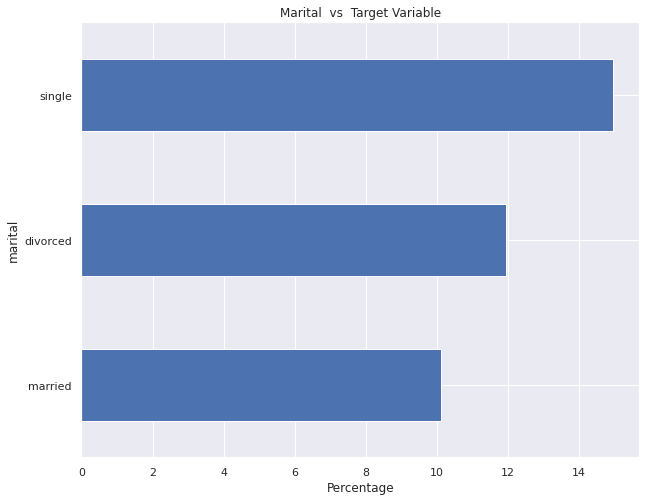

In [ ]:
plt.rcParams['figure.figsize'] = [10,8]
(dataset.groupby('marital')['target'].mean()*100).sort_values().plot(kind='barh')
plt.xlabel('Percentage')
plt.title('Marital  vs  Target Variable')
plt.show()

In [ ]:
m_per = pd.DataFrame(((dataset.groupby('marital')['target'].mean()*100).round(decimals = 2)).sort_values(ascending= False)).reset_index()
m_per.rename(columns= {'target':'Percentage'}, inplace = True)
m_per

,marital,Percentage
0,single,14.95
1,divorced,11.95
2,married,10.12


Feature - 4 ('education_qual')

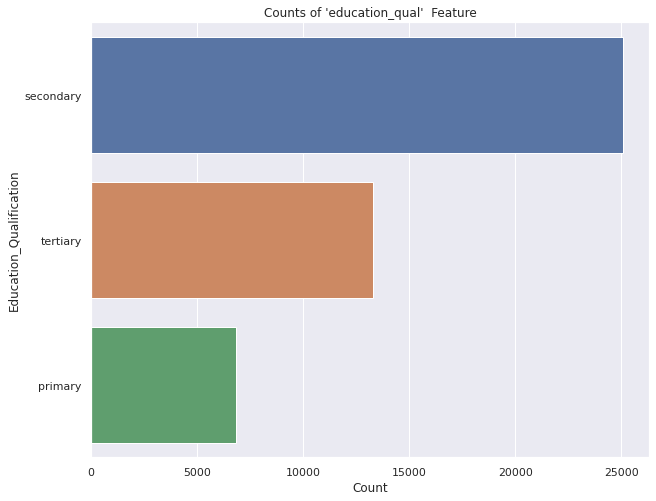

In [ ]:
plt.rcParams['figure.figsize'] = [10,8]
v_edu= pd.DataFrame(dataset['education_qual'].value_counts()).reset_index()
v_edu.rename(columns= {'index':'Education_Qualification', 'education_qual':'Count'}, inplace=True)
sns.barplot(x= v_edu['Count'], y= v_edu['Education_Qualification'], data= v_edu)
plt.title('Counts of \'education_qual\'  Feature')
plt.show()

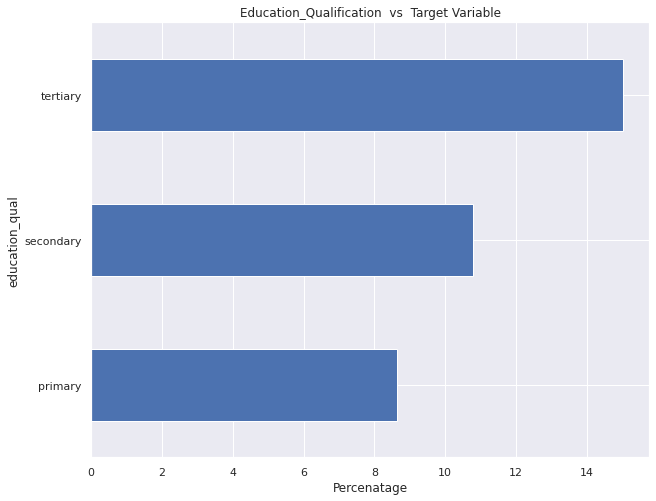

In [ ]:
plt.rcParams['figure.figsize'] = [10,8]
(dataset.groupby('education_qual')['target'].mean()*100).sort_values().plot(kind='barh')
plt.xlabel('Percenatage')
plt.title('Education_Qualification  vs  Target Variable')
plt.show()

In [ ]:
e_per = pd.DataFrame(((dataset.groupby('education_qual')['target'].mean()*100).round(decimals= 2)).sort_values(ascending= False)).reset_index()
e_per.rename(columns={'target':'Percentage'}, inplace= True)
e_per

,education_qual,Percentage
0,tertiary,15.01
1,secondary,10.78
2,primary,8.63


Feature - 5 ('call_type')

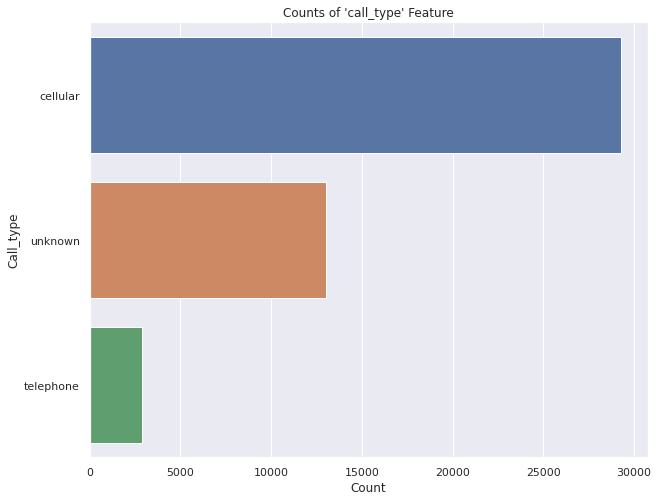

In [ ]:
plt.rcParams['figure.figsize'] = [10,8]
v_call= pd.DataFrame(dataset['call_type'].value_counts()).reset_index()
v_call.rename(columns={'index':'Call_type', 'call_type':'Count'}, inplace= True)
sns.barplot(x= v_call['Count'], y=v_call['Call_type'], data=v_call)
plt.title('Counts of \'call_type\' Feature')
plt.show()

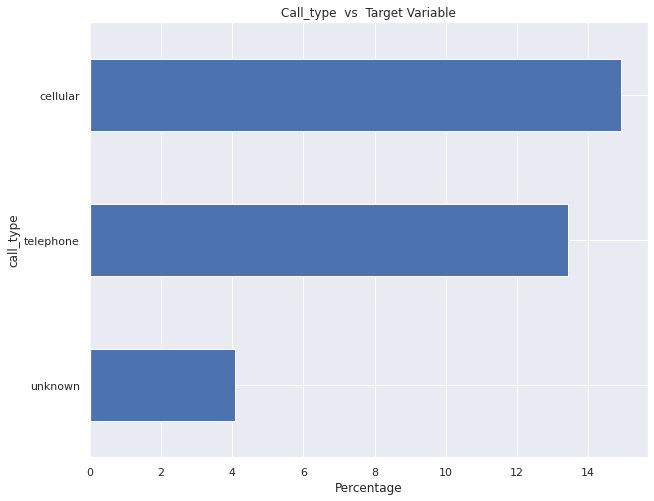

In [ ]:
plt.rcParams['figure.figsize'] = [10,8]
(dataset.groupby('call_type')['target'].mean()*100).sort_values().plot(kind='barh')
plt.xlabel('Percentage')
plt.title('Call_type  vs  Target Variable')
plt.show()

In [ ]:
c_per = pd.DataFrame(((dataset.groupby('call_type')['target'].mean()*100).round(decimals= 2)).sort_values(ascending= False)).reset_index()
c_per.rename(columns={'target':'percentage'}, inplace= True)
c_per

,call_type,percentage
0,cellular,14.92
1,telephone,13.42
2,unknown,4.07


Feature - 6 ('day')

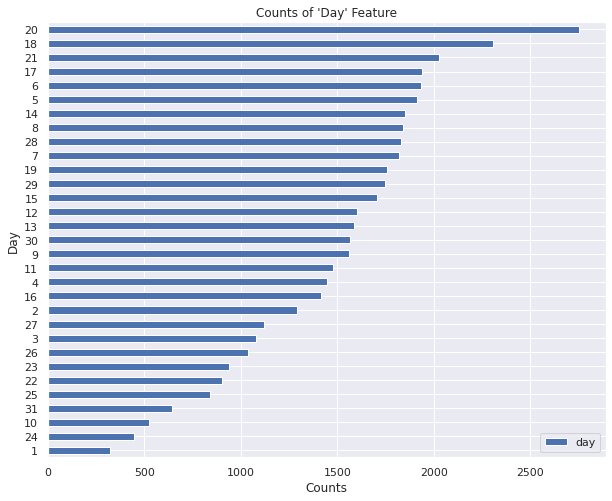

In [ ]:
plt.rcParams['figure.figsize'] = [10, 8]
pd.DataFrame(dataset['day'].value_counts().sort_values()).plot(kind='barh')
plt.xlabel('Counts')
plt.ylabel('Day')
plt.title("Counts of 'Day' Feature")
plt.show()

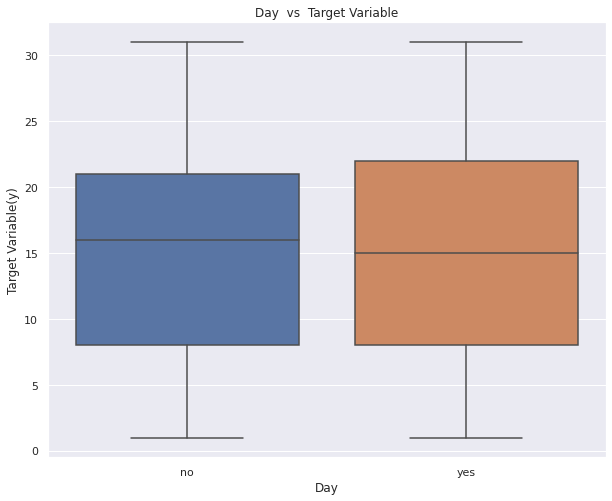

In [ ]:
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data=dataset, x='y', y='day')
plt.xlabel('Day')
plt.ylabel('Target Variable(y)')
plt.title('Day  vs  Target Variable')
plt.show()

Feature - 7 ('mon') 

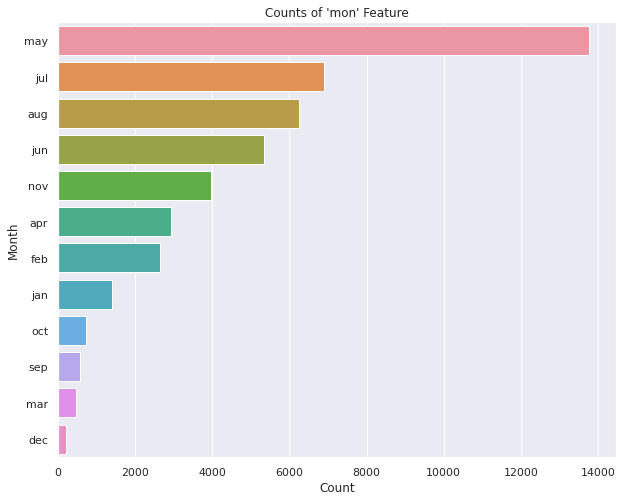

In [ ]:
plt.rcParams['figure.figsize'] = [10,8]
v_mon = pd.DataFrame(dataset['mon'].value_counts()).reset_index()
v_mon.rename(columns= {'index':'Month', 'mon':'Count'}, inplace= True)
sns.barplot(x= v_mon['Count'], y=v_mon['Month'], data= v_mon) 
plt.title("Counts of 'mon' Feature")
plt.show()

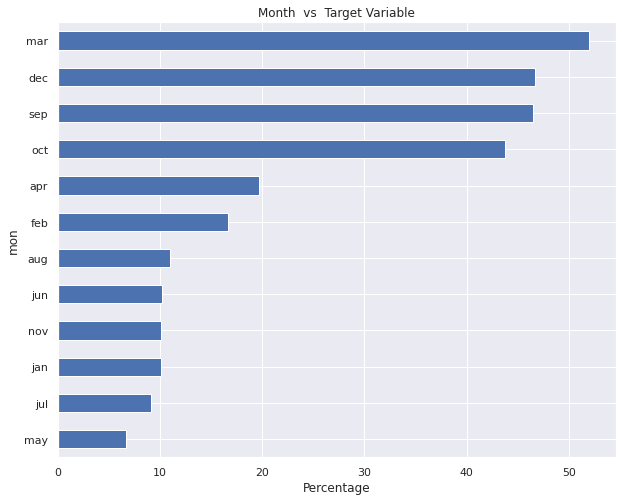

In [ ]:
plt.rcParams['figure.figsize'] = [10,8]
(dataset.groupby('mon')['target'].mean()*100).sort_values().plot(kind= 'barh')
plt.xlabel('Percentage')
plt.title('Month  vs  Target Variable')
plt.show()

In [ ]:
mo_per = pd.DataFrame(((dataset.groupby('mon')['target'].mean()*100).round(decimals= 2)).sort_values(ascending= False)).reset_index()
mo_per.rename(columns={'target':'Percentage'}, inplace= True)
mo_per

,mon,Percentage
0,mar,51.99
1,dec,46.73
2,sep,46.46
3,oct,43.77
4,apr,19.68
5,feb,16.65
6,aug,11.02
7,jun,10.23
8,nov,10.15
9,jan,10.12


Feature - 8 ('dur')

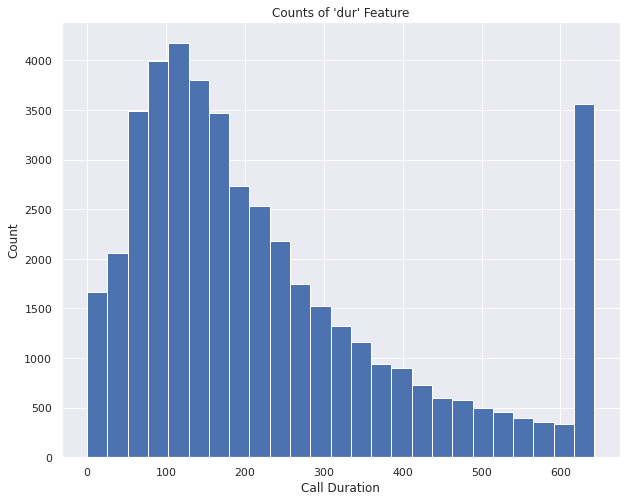

In [ ]:
plt.rcParams['figure.figsize'] = [10, 8]
plt.hist(dataset.dur, bins= 25)
plt.xlabel('Call Duration')
plt.ylabel('Count')
plt.title("Counts of 'dur' Feature")
plt.show()

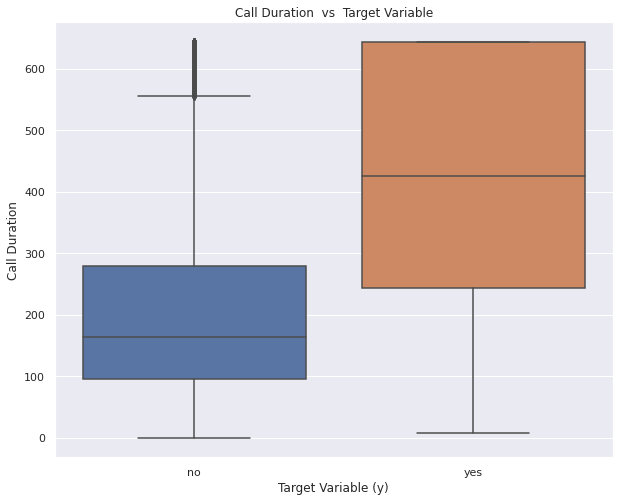

In [ ]:
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data=dataset, x='y', y='dur')
plt.xlabel('Target Variable (y)')
plt.ylabel('Call Duration')
plt.title('Call Duration  vs  Target Variable')
plt.show()

Feature - 9 ('num_calls')

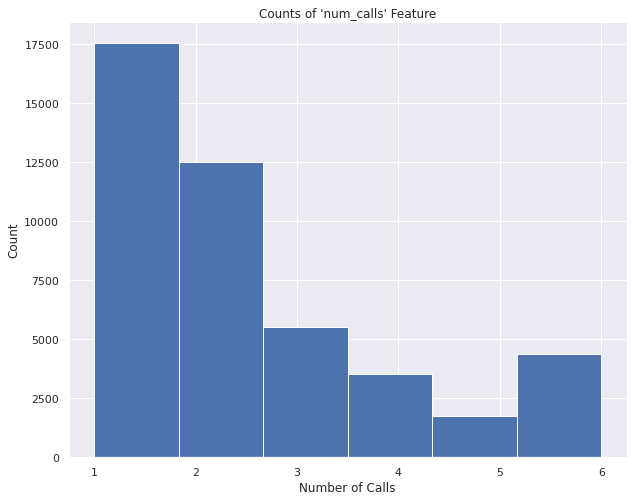

In [ ]:
plt.rcParams['figure.figsize'] = [10, 8]
plt.hist(dataset.num_calls,bins=6)
plt.xlabel('Number of Calls')
plt.ylabel('Count')
plt.title("Counts of 'num_calls' Feature")
plt.show()

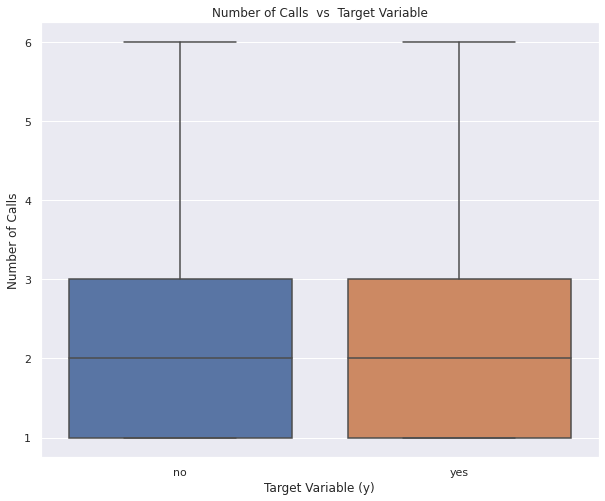

In [ ]:
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data=dataset, x='y', y='num_calls')
plt.xlabel('Target Variable (y)')
plt.ylabel('Number of Calls')
plt.title('Number of Calls  vs  Target Variable')
plt.show()

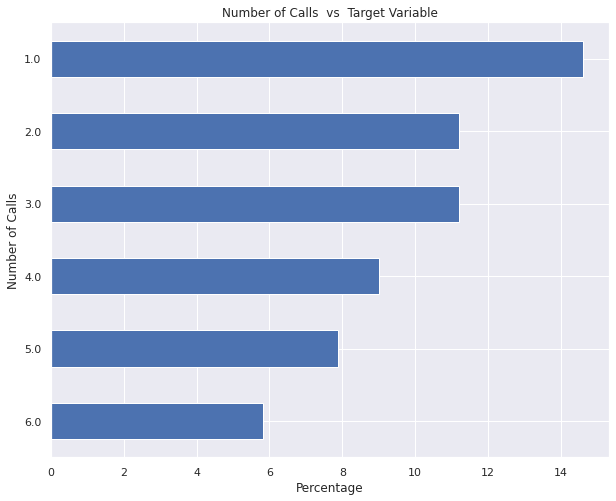

In [ ]:
plt.rcParams['figure.figsize'] = [10,8]
(dataset.groupby('num_calls')['target'].mean()*100).sort_values().plot(kind= 'barh')
plt.xlabel('Percentage')
plt.ylabel('Number of Calls')
plt.title('Number of Calls  vs  Target Variable')
plt.show()

Feature - 10 ('prev_outcome')

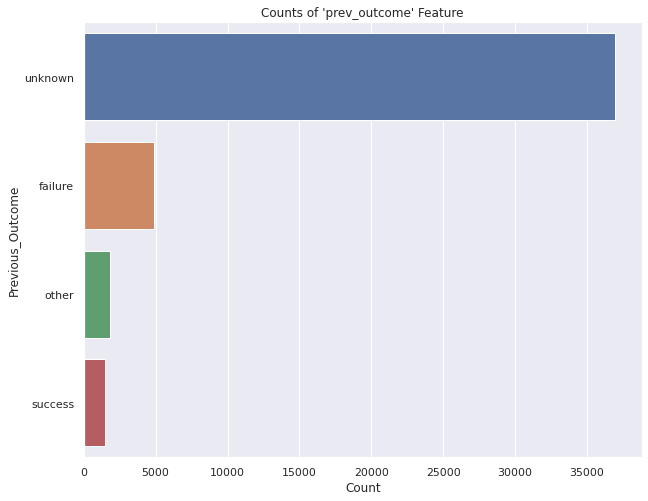

In [ ]:
plt.rcParams['figure.figsize'] = [10,8]
v_pre = pd.DataFrame(dataset['prev_outcome'].value_counts()).reset_index()
v_pre.rename(columns={'index':'Previous_Outcome', 'prev_outcome': 'Count'}, inplace= True)
sns.barplot(x= v_pre['Count'], y= v_pre['Previous_Outcome'], data=v_pre)
plt.title("Counts of 'prev_outcome' Feature")
plt.show()

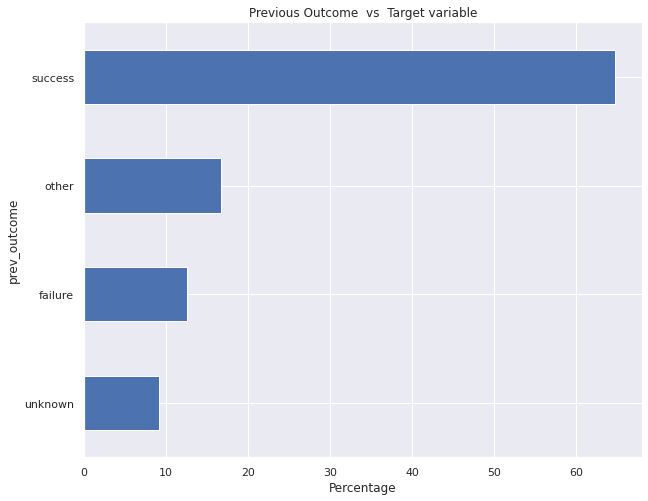

In [ ]:
plt.rcParams['figure.figsize'] = [10,8]
(dataset.groupby('prev_outcome')['target'].mean()*100).sort_values().plot(kind='barh')
plt.xlabel('Percentage')
plt.title('Previous Outcome  vs  Target variable')
plt.show()

In [ ]:
p_per = pd.DataFrame(((dataset.groupby('prev_outcome')['target'].mean()*100).round(decimals= 2)).sort_values(ascending= False)).reset_index()
p_per.rename(columns={'target':'Percentage'}, inplace= True)
p_per

,prev_outcome,Percentage
0,success,64.73
1,other,16.68
2,failure,12.61
3,unknown,9.16


Data Encoding

In [ ]:
dataset['job'] = dataset['job'].map({'blue-collar':1, 'entrepreneur':2, 'housemaid':3, 'services':4, 'technician':5, 'self-employed':6, 'admin':7, 'management':8, 'unemployed':9, 'retired':10, 'student':11})

In [ ]:
dataset['marital'] = dataset['marital'].map({'married':1,'divorced':2, 'single':3,})

In [ ]:
dataset['education_qual'] = dataset['education_qual'].map({'primary': 1, 'secondary':2, 'tertiary':3})

In [ ]:
dataset['call_type'] = dataset['call_type'].map({'unknown':1, 'telephone':2, 'cellular':3})

In [ ]:
dataset['mon'] = dataset['mon'].map({'may':1, 'jul':2, 'jan':3, 'nov':4, 'jun':5, 'aug':6, 'feb':7, 'apr':8, 'oct':9, 'sep':10, 'dec':11, 'mar':12})

In [ ]:
dataset['prev_outcome'] = dataset['prev_outcome'].map({'unknown':1, 'failure':2, 'other':3, 'success':4})

In [ ]:
dataset['y'] = dataset['y'].map({'no':0, 'yes':1})

In [ ]:
del dataset['target']

In [ ]:
dataset.fillna(0, inplace=True)

In [ ]:
dataset

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58.0,8.0,1,3,1,5,1,261.0,1.0,1,0
1,44.0,5.0,3,2,1,5,1,151.0,1.0,1,0
2,33.0,2.0,1,2,1,5,1,76.0,1.0,1,0
3,47.0,1.0,1,2,1,5,1,92.0,1.0,1,0
4,33.0,1.0,3,2,1,5,1,198.0,1.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,5.0,1,3,3,17,4,643.0,3.0,1,1
45207,70.5,10.0,2,1,3,17,4,456.0,2.0,1,1
45208,70.5,10.0,1,2,3,17,4,643.0,5.0,4,1
45209,57.0,1.0,1,2,2,17,4,508.0,4.0,1,0


Data Spliting

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1 ]

In [ ]:
X

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome
0,58.0,8.0,1,3,1,5,1,261.0,1.0,1
1,44.0,5.0,3,2,1,5,1,151.0,1.0,1
2,33.0,2.0,1,2,1,5,1,76.0,1.0,1
3,47.0,1.0,1,2,1,5,1,92.0,1.0,1
4,33.0,1.0,3,2,1,5,1,198.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...
45206,51.0,5.0,1,3,3,17,4,643.0,3.0,1
45207,70.5,10.0,2,1,3,17,4,456.0,2.0,1
45208,70.5,10.0,1,2,3,17,4,643.0,5.0,4
45209,57.0,1.0,1,2,2,17,4,508.0,4.0,1


In [ ]:
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45205, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Dataset Balancing 

In [ ]:
from imblearn.combine import SMOTEENN

smote = SMOTEENN(sampling_strategy='all')
X_train,y_train = smote.fit_resample(X_train,y_train)

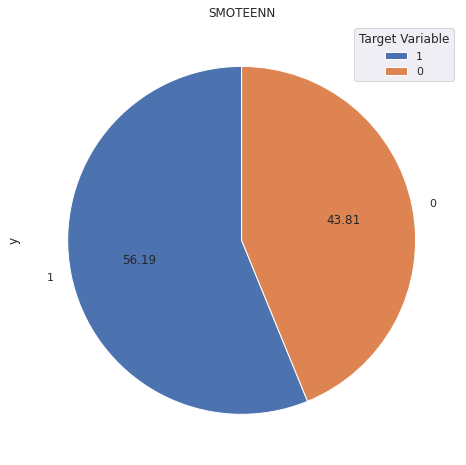

In [ ]:
y_train.value_counts().plot.pie(autopct='%.2f',startangle = 90)
plt.title("SMOTEENN")
plt.legend(title = "Target Variable")
plt.show()

Scaling a Data

In [ ]:
from sklearn.preprocessing import StandardScaler

Scaler = StandardScaler()
X_train = Scaler.fit_transform(X_train)
X_test = Scaler.transform(X_test)

Model  Training

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

for i in range(1,20,2):
  knn = KNeighborsClassifier(i)
  knn.fit(X_train, y_train)
  print('k-value:', i, 'Train-Score:', knn.score(X_train,y_train), 'CV_Score:', np.mean(cross_val_score(knn, X_train, y_train, cv=10, scoring='roc_auc')))

k-value: 1 Train-Score: 1.0 CV_Score: 0.9372862728744193
k-value: 3 Train-Score: 0.9645305576456819 CV_Score: 0.9616050700421489
k-value: 5 Train-Score: 0.9502967979265947 CV_Score: 0.9672551123570724
k-value: 7 Train-Score: 0.9434620851099407 CV_Score: 0.9691692838020153
k-value: 9 Train-Score: 0.9379232505643341 CV_Score: 0.969925970035805
k-value: 11 Train-Score: 0.9341192208009363 CV_Score: 0.9697419939970423
k-value: 13 Train-Score: 0.9310467352228075 CV_Score: 0.9695083255751167
k-value: 15 Train-Score: 0.927932447119806 CV_Score: 0.9693438930842756
k-value: 17 Train-Score: 0.9254033943650196 CV_Score: 0.9689925965360902
k-value: 19 Train-Score: 0.922602625198562 CV_Score: 0.9686666235450178


In [ ]:
kn = KNeighborsClassifier(9)
kn.fit(X_train, y_train)
y_predict_knn = kn.predict(X_test)

print('Train-Score:', kn.score(X_test, y_test))
print('Train-Score:', kn.score(X_test, y_test))
print('AUROC Score:', roc_auc_score(y_test, y_predict_knn))

Train-Score: 0.7815956348621147
Train-Score: 0.7815956348621147
AUROC Score: 0.8232195079914599


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score,accuracy_score

for depth in range(1,31):
  dt = DecisionTreeClassifier(max_depth=depth)
  dt.fit(X_train, y_train)
  trainaccuracy = accuracy_score(y_train, dt.predict(X_train)) 
  dt = DecisionTreeClassifier(max_depth=depth)
  valaccuracy = cross_val_score(dt, X_train, y_train, cv=10)
  print('Depth:',depth, 'Training Accuracy:',trainaccuracy, 'CV_Score:', np.mean(valaccuracy))

Depth: 1 Training Accuracy: 0.7842153666081432 CV_Score: 0.7842153398825062
Depth: 2 Training Accuracy: 0.8052211353565756 CV_Score: 0.8052211306933945
Depth: 3 Training Accuracy: 0.8561575119137196 CV_Score: 0.8545481192969948
Depth: 4 Training Accuracy: 0.8627205083187024 CV_Score: 0.8618007517220411
Depth: 5 Training Accuracy: 0.8786890728199983 CV_Score: 0.8777488659516395
Depth: 6 Training Accuracy: 0.8900175570604465 CV_Score: 0.8859632814711527
Depth: 7 Training Accuracy: 0.902704623359251 CV_Score: 0.9003641535875418
Depth: 8 Training Accuracy: 0.9152871833458741 CV_Score: 0.9063001366449642
Depth: 9 Training Accuracy: 0.9274099155588997 CV_Score: 0.9145562446049702
Depth: 10 Training Accuracy: 0.9364810634562327 CV_Score: 0.9219555213651915
Depth: 11 Training Accuracy: 0.946492768163197 CV_Score: 0.9271393324316861
Depth: 12 Training Accuracy: 0.9578421536660814 CV_Score: 0.9328244269473653
Depth: 13 Training Accuracy: 0.9679165621603545 CV_Score: 0.936377728967684
Depth: 14 T

In [ ]:
tr = DecisionTreeClassifier(max_depth=15)
tr.fit(X_train, y_train)
y_predict_dt = tr.predict(X_test)

print('Training Accuracy:', tr.score(X_train, y_train))
print('Test Accuracy    :', tr.score(X_test, y_test))
print('AUROC Score      :',roc_auc_score(y_test, y_predict_dt))

Training Accuracy: 0.9828818660647103
Test Accuracy    : 0.8287863147028461
AUROC Score      : 0.8000080541350549


In [ ]:
from sklearn.ensemble import RandomForestClassifier

tree = RandomForestClassifier(n_estimators=100,max_depth=6, max_features='sqrt')
tree.fit(X_train,y_train)
y_pred_rf = tree.predict(X_test)

print("Training Accuracy :",tree.score(X_train,y_train))
print("Testing Accuracy  :",tree.score(X_test,y_test))
print("AUROC Score       :", roc_auc_score(y_test,y_pred_rf))

Training Accuracy : 0.9102708803611738
Testing Accuracy  : 0.7554932900752102
AUROC Score       : 0.824355172332669


In [ ]:
from xgboost import XGBClassifier

for lr in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.16,0.2,0.5,0.7,1]:
    model = XGBClassifier(learning_rate = lr, n_estimators=100, verbosity = 0) 
    model.fit(X_train,y_train) 
    model.score(X_test, y_test) 
    print('Learning rate :', lr, 'Train score :', model.score(X_train,y_train), 'CV_Score :', np.mean(cross_val_score(model, X_train, y_train, cv=10))) 

Learning rate : 0.01 Train score : 0.9153916896580554 CV_Score : 0.9124867854534271
Learning rate : 0.02 Train score : 0.9297299556893236 CV_Score : 0.9243171377597916
Learning rate : 0.03 Train score : 0.9412674525541342 CV_Score : 0.9360011646274765
Learning rate : 0.04 Train score : 0.949732463840816 CV_Score : 0.9432749971168262
Learning rate : 0.05 Train score : 0.9562745589833626 CV_Score : 0.9496918891952625
Learning rate : 0.06 Train score : 0.9606011203076665 CV_Score : 0.9531408028503232
Learning rate : 0.07 Train score : 0.9655129169801856 CV_Score : 0.9551474219184115
Learning rate : 0.08 Train score : 0.9674149318618844 CV_Score : 0.9567987771848342
Learning rate : 0.09 Train score : 0.9692751442187109 CV_Score : 0.9587636470226425
Learning rate : 0.1 Train score : 0.9725566424212022 CV_Score : 0.960477488528463
Learning rate : 0.11 Train score : 0.9725775436836385 CV_Score : 0.9613136788249232
Learning rate : 0.12 Train score : 0.9756918317866399 CV_Score : 0.962734987401

In [ ]:
tree = XGBClassifier(learning_rate = 0.16, n_estimators=100, verbosity = 0)
tree.fit(X_train,y_train)
y_pred_x = tree.predict(X_test)

print("Training Accuracy :",tree.score(X_train,y_train))
print("Testing Accuracy :",tree.score(X_test,y_test))
print("AUCROC Score :", roc_auc_score(y_test,y_pred_x))

Training Accuracy : 0.9792868489256751
Testing Accuracy : 0.8742810794868013
AUCROC Score : 0.849303716373008
